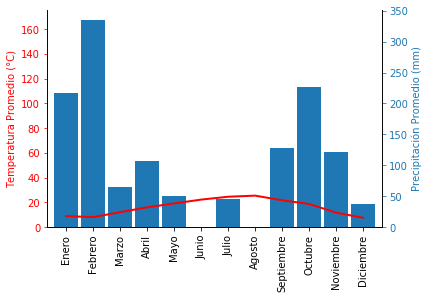

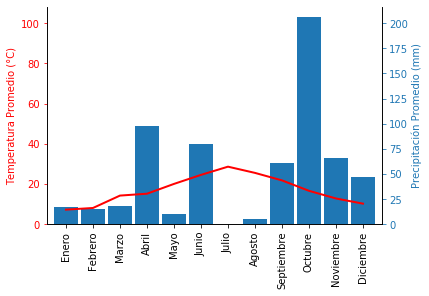

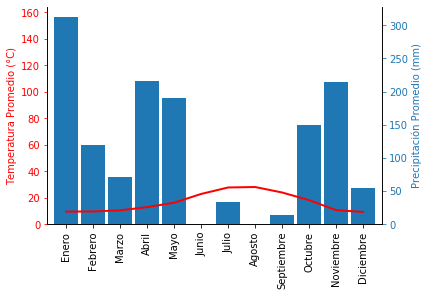

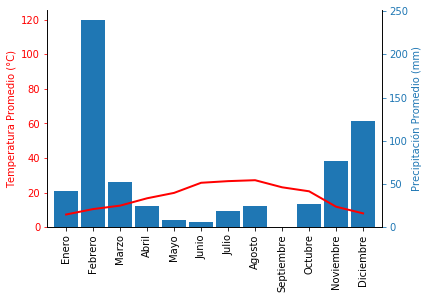

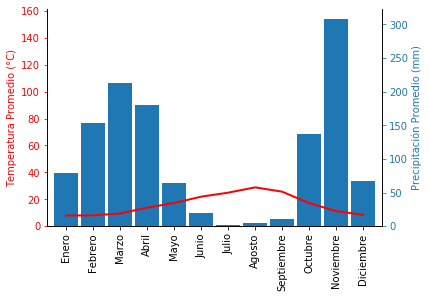

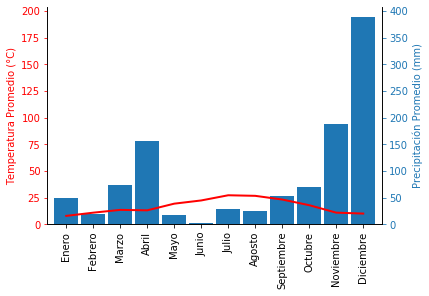

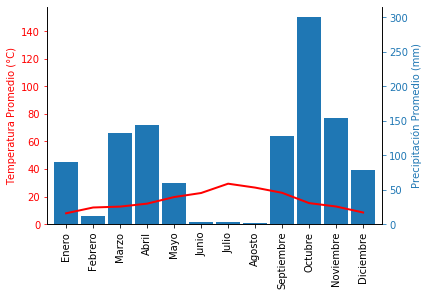

16.806137856003776


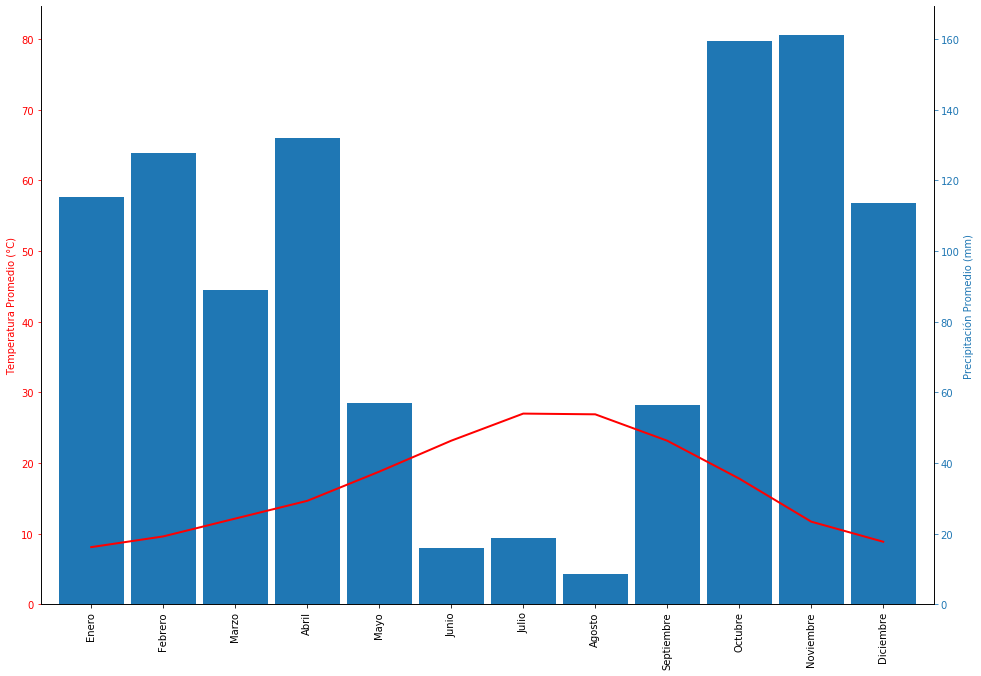

In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from config import config
import datetime
from jinja2 import Environment, FileSystemLoader


params = config()
conn = psycopg2.connect(**params)
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
a = []

estacion = 'madrigal'

for i in range(2014,2021):
    sql = '''select 
        avg(tmed) as temp_media, sum(prectotal) as precip, extract(month from fecha) as mes 
        from meteo_{}
        where extract(year from fecha) = {} 
        group by mes;'''.format(estacion, i)

    df = pd.read_sql(sql, conn)

    a.append(df)
    
    fig = plt.figure()
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()

    df['precip'].plot(kind='bar', width=0.9, ax=ax1, xticks=df.index)
    df['temp_media'].plot(color='red', ax=ax2, lw=2)
    ax1.set_xticklabels(meses)

    ax2.set_ylim(0,  ax1.get_ylim()[1] / 2)

    ax1.yaxis.set_label_position("right")
    ax1.yaxis.tick_right()
    ax2.yaxis.set_label_position("left")
    ax2.yaxis.set_tick_params(labelcolor='red', color='red')
    ax1.yaxis.set_tick_params(labelcolor='C0', color='C0')

    ax2.yaxis.tick_left()
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    ax2.set_ylabel("Temperatura Promedio (°C)", color='red')
    ax1.set_ylabel("Precipitación Promedio (mm)", color='C0')

    plt.show()
    fig.savefig('static/images/climodiagrama_{}_{}'.format(estacion, i), bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    
b = pd.concat(a)
datos_medios = b.groupby(b.index).mean()
print(datos_medios.mean()['temp_media'])

fig = plt.figure(figsize=(16,11))

ax1 = fig.add_subplot()
ax2 = ax1.twinx()

datos_medios['precip'].plot(kind='bar', width=0.9, ax=ax1, xticks=datos_medios.index)
datos_medios['temp_media'].plot(color='red', ax=ax2, lw=2)

ax1.set_xticklabels(meses)
ax2.set_ylim(0,  ax1.get_ylim()[1] / 2)

ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()
ax2.yaxis.set_label_position("left")
ax2.yaxis.set_tick_params(labelcolor='red', color='red')
ax1.yaxis.set_tick_params(labelcolor='C0', color='C0')

ax2.yaxis.tick_left()
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.set_ylabel("Temperatura Promedio (°C)", color='red')
ax1.set_ylabel("Precipitación Promedio (mm)", color='C0')

plt.show()
fig.savefig('static/images/climodiagrama_{}_media'.format(estacion), bbox_inches='tight', pad_inches=0)
plt.close(fig)